<a href="https://colab.research.google.com/github/SisekoC/OpenCV/blob/main/Brain_Tumour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Brain Tumor Detection</center>

## Overview:
A brain tumor is an abnormal growth of cells in the brain, which can be either non-cancerous or cancerous. These tumors may originate within the brain or spread from other parts of the body. They can disrupt normal brain functions, leading to symptoms such as headaches, seizures, cognitive impairments, and motor deficits. Treatment options include surgery, radiation therapy, chemotherapy, or a combination, depending on the tumor type, location, and stage. Therefore Early detection is crucial for effective management.

Types of Brain Tumors We've taken for Detection:
* Pituatory Tumor
* Glioma Tumor
* Meningioma Tumor

## Dataset Information:

Brain MRI Dataset: [Kaggle - Brain Tumor Detection](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

This dataset of size 164MB contains 7023 images of human brain MRI images which are classified into 4 classes: glioma, meningioma, no tumor and, pituitary.

### Training Data:

   * Glioma Tumor: 1321 Images
   * Meningioma Tumor: 1339 Images
   * No Tumor: 1595 Images
   * Pituitary Tumor: 1457 Images
   
### Testing Data:

   * Glioma Tumor: 300 Images
   * Meningioma Tumor: 306 Images
   * No Tumor: 405 Images
   * Pituitary Tumor: 300 Images

# 1. Importing required libraries
* ```Numpy```: A fundamental package for scientific computing in Python. It provides support for multidimensional arrays, along with a collection of mathematical functions to operate on these arrays efficiently. NumPy is widely used in numerical and scientific computing tasks, including data manipulation, linear algebra, statistics, and signal processing.

* ```Pandas```: A powerful library for data manipulation and analysis in Python. It offers data structures and functions for working with structured data, primarily in the form of dataframes. Dataframes are two-dimensional labeled arrays capable of holding heterogeneous data types. Pandas provides tools for reading and writing data from various file formats, reshaping and transforming data, and performing data analysis tasks such as grouping, filtering, and aggregation.

* ```PIL (Python Imaging Library)```: Also known as the Pillow library, it is a Python imaging library that adds support for opening, manipulating, and saving many different image file formats. PIL/Pillow provides functions for basic image processing tasks such as resizing, cropping, rotating, and filtering images.

* ```Matplotlib```: A plotting library for creating visualizations in Python. It provides a MATLAB-like interface for generating a wide range of static, interactive, and animated plots. Matplotlib is highly customizable and supports various plot types, including line plots, scatter plots, bar charts, histograms, and heatmaps.

* ```Seaborn```: Built on top of Matplotlib, Seaborn is a statistical data visualization library that provides an easy-to-use interface for creating informative and visually appealing plots. Seaborn simplifies the process of creating complex statistical visualizations by providing high-level functions for common statistical plots such as scatter plots, box plots, violin plots, and pair plots.

* ```Sklearn```: Scikit-learn is a machine learning library for Python that provides simple and efficient tools for data mining and data analysis. It features various supervised and unsupervised learning algorithms, including classification, regression, clustering, dimensionality reduction, and model evaluation.

* ```TensorFlow```: TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources for building and deploying machine learning models at scale.

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, EfficientNetB0, Xception, ResNet50, InceptionV3

# 2. Preprocessing

## 2.1 Load Data
* Defines functions to create dataframes for training and testing images.
* These functions parse the directory structure to create dataframes containing image paths and corresponding labels.

## 2.2 Split Data
* Splits the testing data into validation and testing subsets using train_test_split function.

## 2.3 Data Preprocessing
* Defines parameters for image data generators.

In [3]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [4]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
tr_df = train_df('Training')

In [9]:
tr_df["Class Path"][0]

'Training/pituitary/Tr-pi_1097.jpg'

In [10]:
ts_df = test_df('Testing')

In [11]:
ts_df

,Class Path,Class
0,Testing/pituitary/Te-pi_0288.jpg,pituitary
1,Testing/pituitary/Te-pi_0219.jpg,pituitary
2,Testing/pituitary/Te-pi_0014.jpg,pituitary
3,Testing/pituitary/Te-pi_0027.jpg,pituitary
4,Testing/pituitary/Te-pi_0276.jpg,pituitary
...,...,...
1306,Testing/meningioma/Te-me_0301.jpg,meningioma
1307,Testing/meningioma/Te-me_0141.jpg,meningioma
1308,Testing/meningioma/Te-me_0294.jpg,meningioma
1309,Testing/meningioma/Te-me_0149.jpg,meningioma


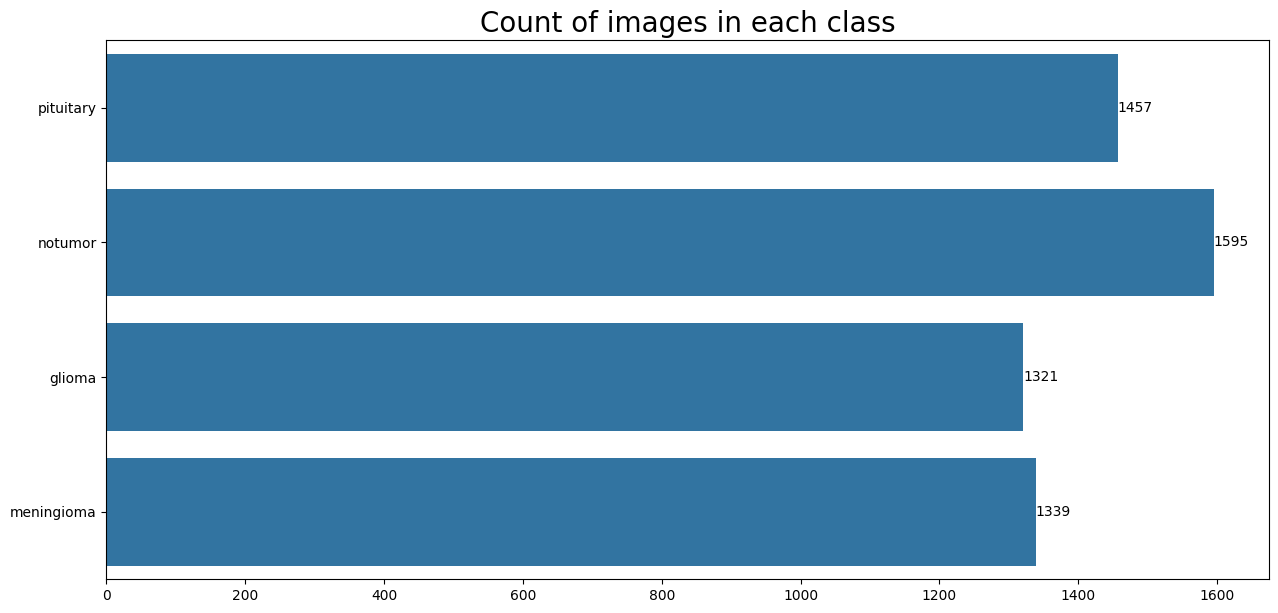

In [12]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

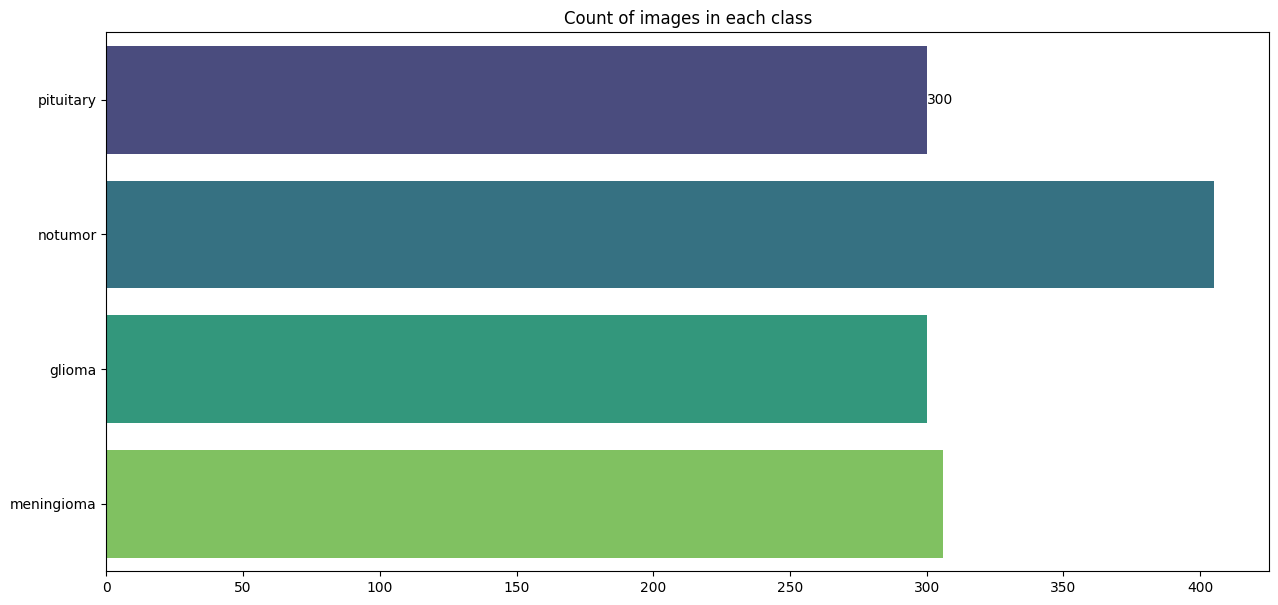

In [13]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [14]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [15]:
valid_df

,Class Path,Class
991,Testing/glioma/Te-glTr_0001.jpg,glioma
1023,Testing/meningioma/Te-me_0039.jpg,meningioma
61,Testing/pituitary/Te-pi_0071.jpg,pituitary
1078,Testing/meningioma/Te-me_0259.jpg,meningioma
814,Testing/glioma/Te-gl_0068.jpg,glioma
...,...,...
764,Testing/glioma/Te-gl_0072.jpg,glioma
554,Testing/notumor/Te-no_0155.jpg,notumor
978,Testing/glioma/Te-gl_0262.jpg,glioma
1199,Testing/meningioma/Te-me_0020.jpg,meningioma


In [16]:
batch_size = 64
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


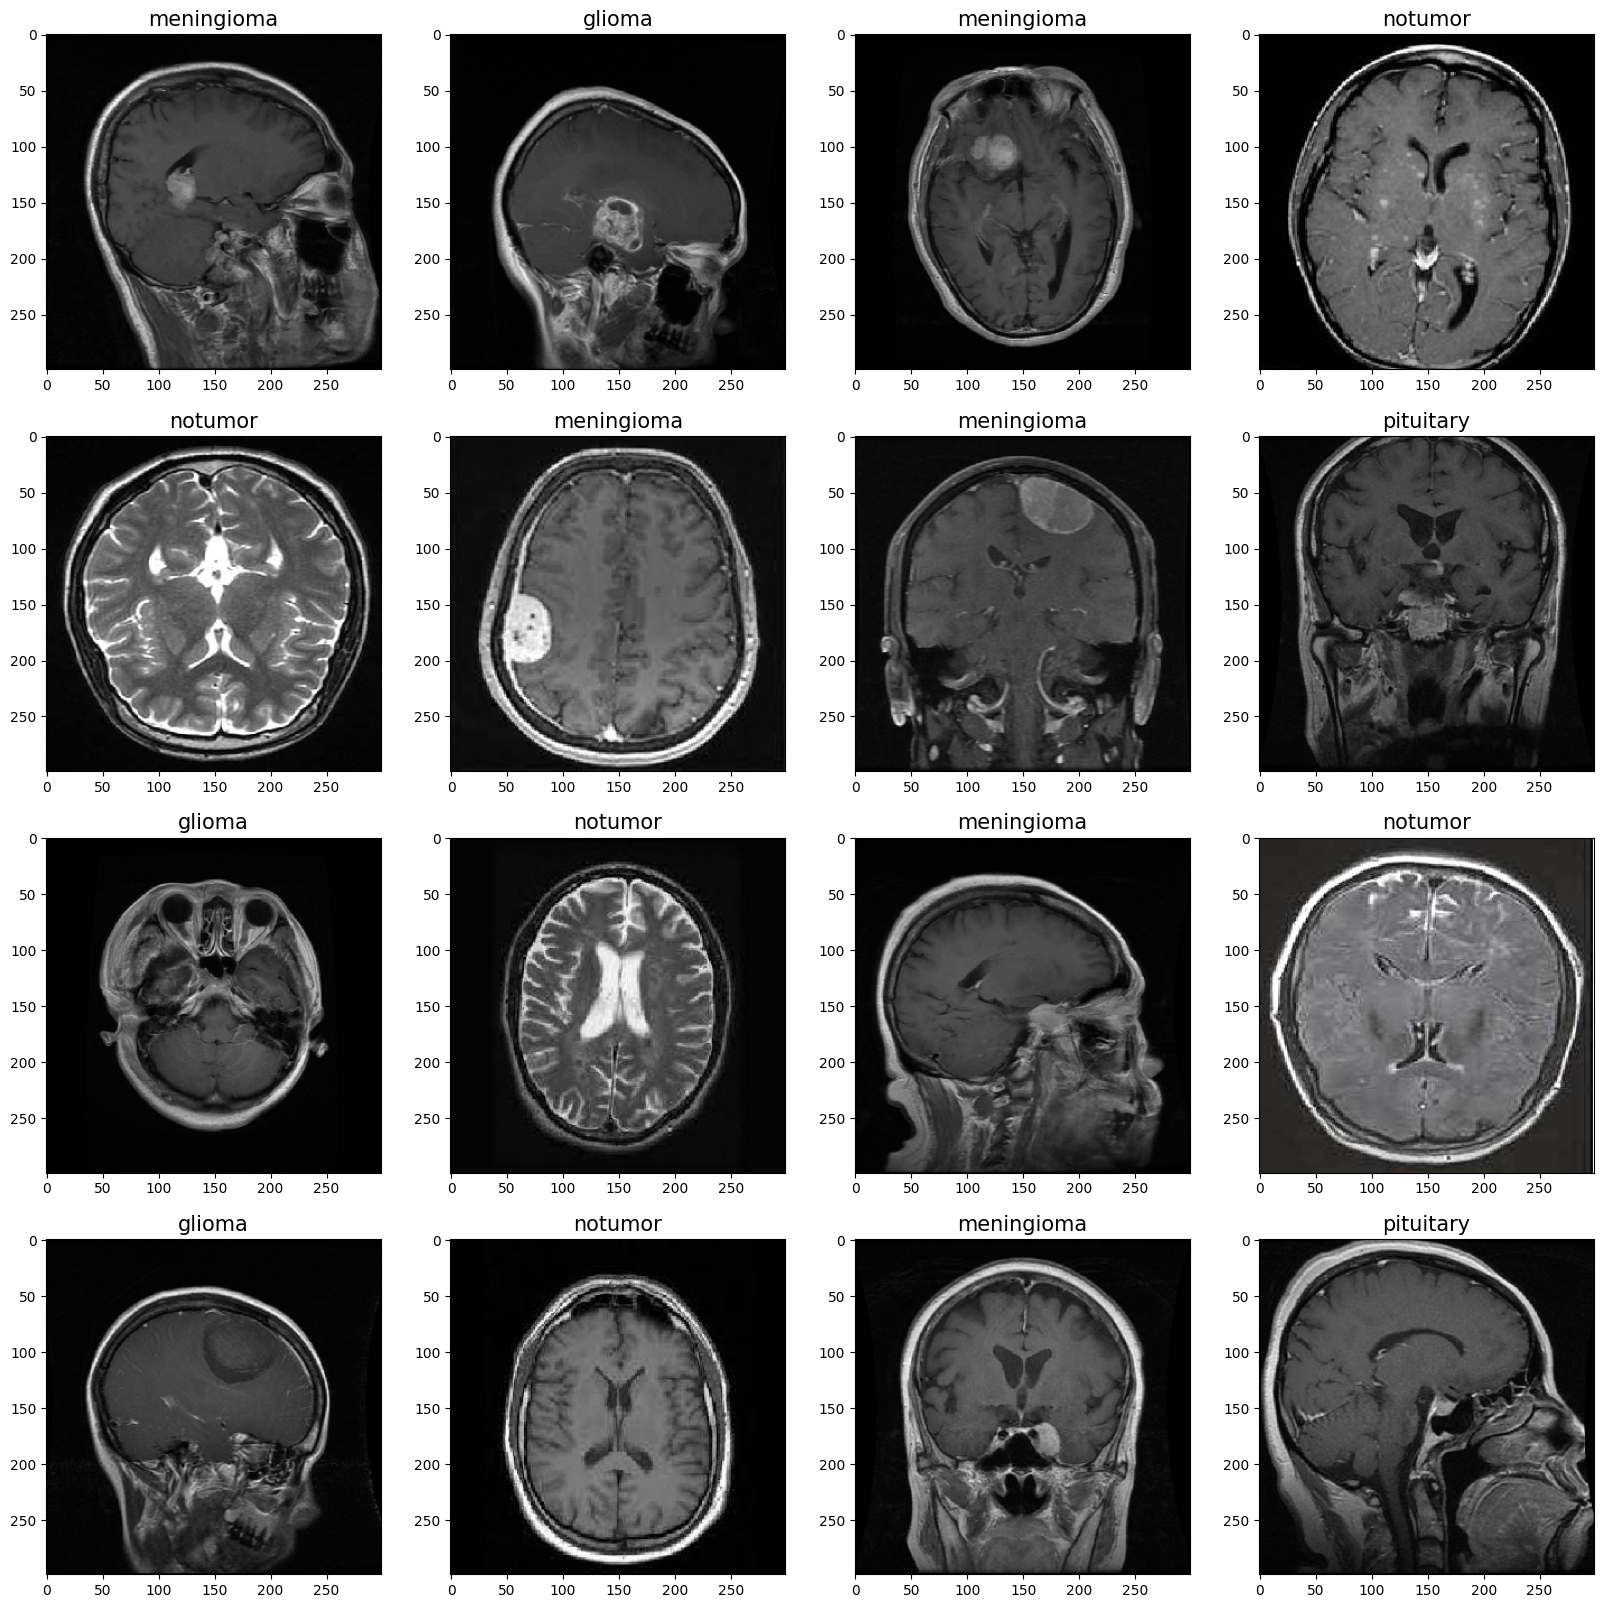

In [17]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

# 3. Building Deep Learning Model

## 3.1 XCeption Model Training and Evaluation

In [19]:
img_shape=(299,299,3)
xception = Xception(include_top= False, weights= "imagenet",input_shape= img_shape, pooling= 'max')

xception_model = Sequential([xception,
                    Flatten(),
                    Dropout(rate= 0.3),
                    Dense(128, activation= 'relu'),
                    Dropout(rate= 0.25),
                    Dense(4, activation= 'softmax')
                   ])

xception_model.compile(Adamax(learning_rate= 0.001),loss= 'categorical_crossentropy',metrics=['accuracy'])
xception_hist = xception_model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle= False)
xception_model.summary()

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.6691 - loss: 0.9597 - val_accuracy: 0.8824 - val_loss: 0.3379
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9610 - loss: 0.1115 - val_accuracy: 0.9374 - val_loss: 0.1423
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9865 - loss: 0.0445 - val_accuracy: 0.9008 - val_loss: 0.3117
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9944 - loss: 0.0154 - val_accuracy: 0.9450 - val_loss: 0.1397
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9970 - loss: 0.0078 - val_accuracy: 0.9817 - val_loss: 0.0612
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9420 - val_loss: 0.2228
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9946 - loss: 0.0118 - val_accuracy: 0.9573 - val_loss: 0.1531
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9985 - loss: 0.0056 - val_accuracy: 0.9786 - v

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,263,750 (241.33 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 42,139,482 (160.75 MB)

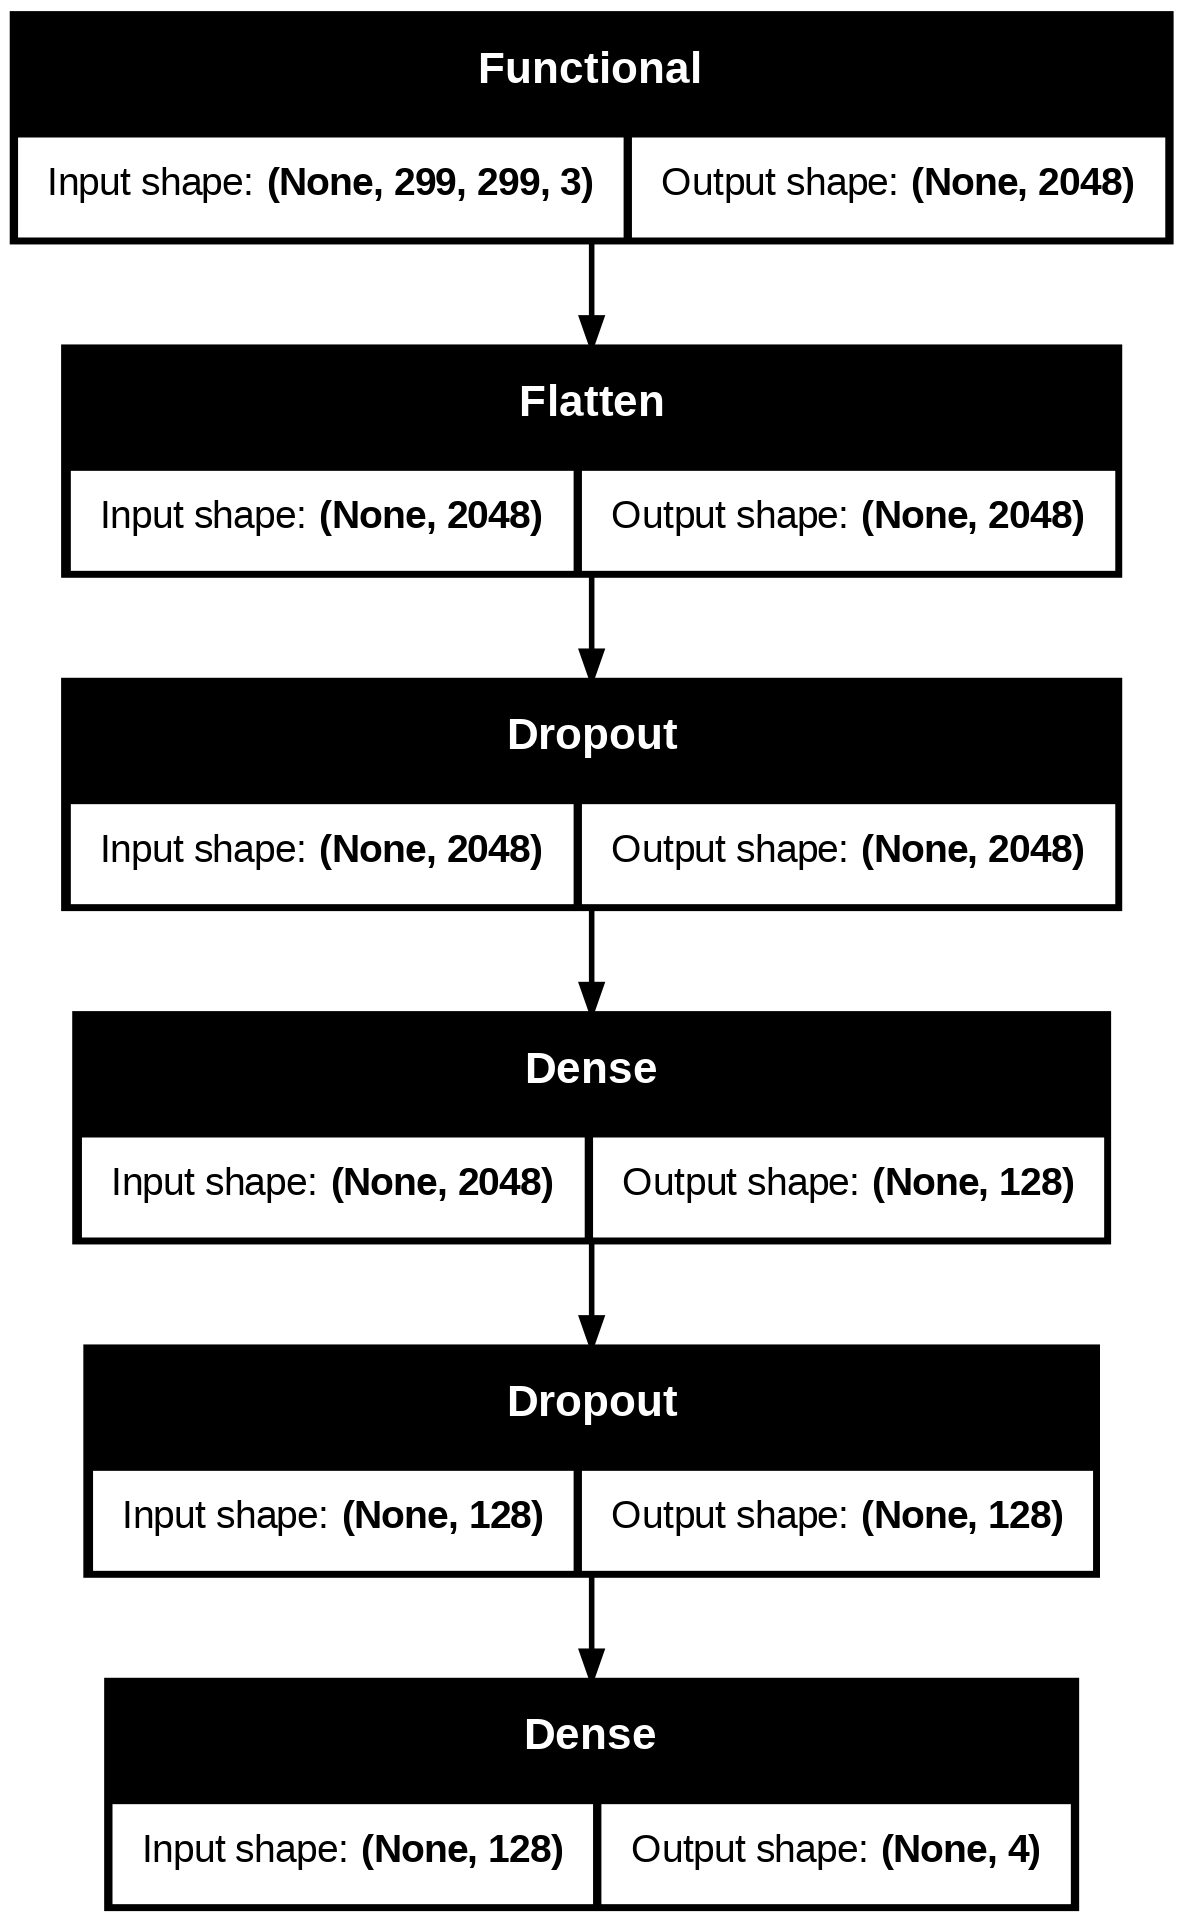

In [20]:
tf.keras.utils.plot_model(xception_model, show_shapes=True)

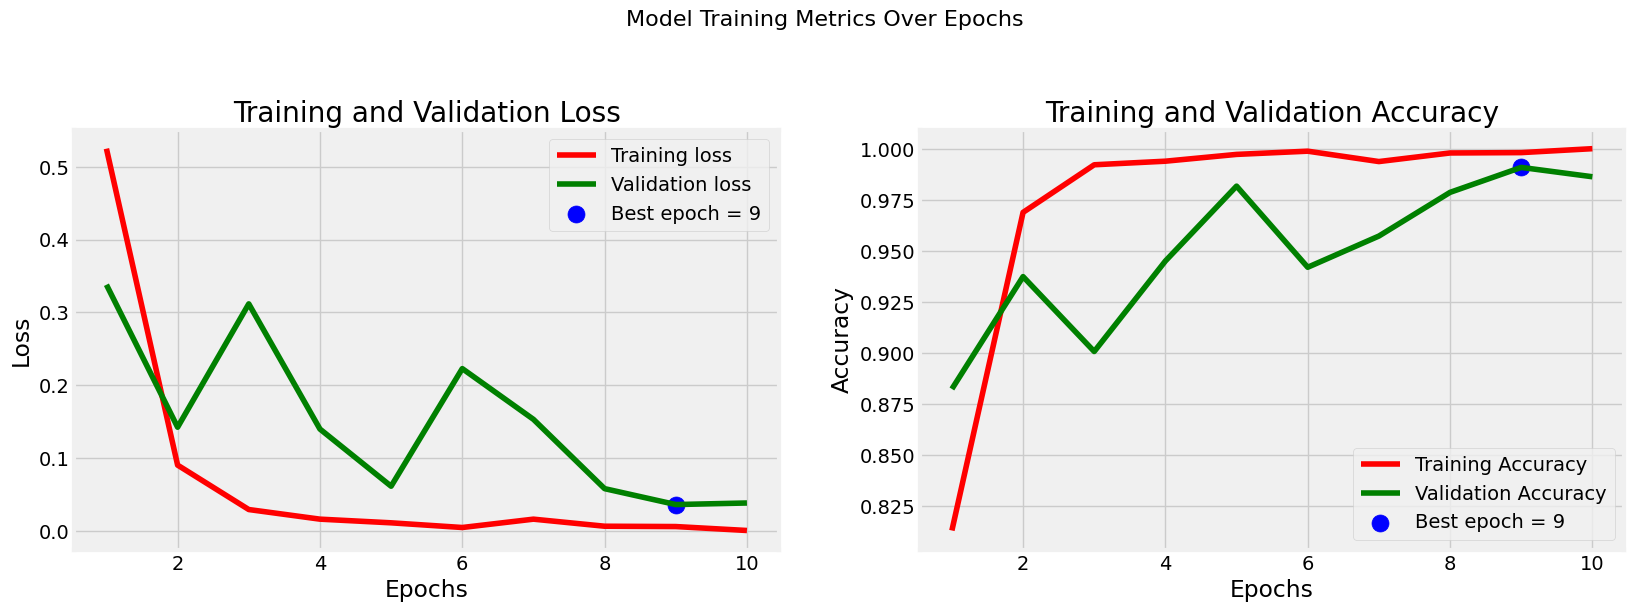

In [21]:
tr_acc = xception_hist.history['accuracy']
tr_loss = xception_hist.history['loss']
val_acc = xception_hist.history['val_accuracy']
val_loss = xception_hist.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [22]:
train_score = xception_model.evaluate(tr_gen, verbose=1)
valid_score = xception_model.evaluate(valid_gen, verbose=1)
test_score = xception_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - accuracy: 1.0000 - loss: 3.6242e-05
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.9876 - loss: 0.0354
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9952 - loss: 0.0593
Train Loss: 0.0000
Train Accuracy: 100.00%
--------------------
Validation Loss: 0.0409
Validation Accuracy: 98.63%
--------------------
Test Loss: 0.0372
Test Accuracy: 99.70%


In [23]:
y_pred_xception = np.argmax(xception_model.predict(ts_gen), axis=1)

# Calculate metrics
acc_xception = accuracy_score(ts_gen.classes, y_pred_xception)
prec_xception = precision_score(ts_gen.classes, y_pred_xception, average='weighted')
recall_xception = recall_score(ts_gen.classes, y_pred_xception, average='weighted')
f1_xception = f1_score(ts_gen.classes, y_pred_xception, average='weighted')

# Print metrics
print("Xception Model Metrics:")
print(f"Accuracy: {acc_xception}")
print(f"Precision: {prec_xception}")
print(f"Recall: {recall_xception}")
print(f"F1 Score: {f1_xception}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step
Xception Model Metrics:
Accuracy: 0.9969512195121951
Precision: 0.9969905586152635
Recall: 0.9969512195121951
F1 Score: 0.9969508873431364


In [24]:
xception_results = pd.DataFrame({
    'Model': ['Xception'],
    'Accuracy': [acc_xception],
    'Precision': [prec_xception],
    'Recall': [recall_xception],
    'F1 Score': [f1_xception]
})
xception_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Xception,0.996951,0.996991,0.996951,0.996951


## 3.2 Resnet-50 Model Training and Evaluation

In [32]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=img_shape)

resnet_model = Sequential([
    resnet,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

resnet_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
resnet_hist = resnet_model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle= False)
resnet_model.summary()

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.6632 - loss: 9.7310 - val_accuracy: 0.2504 - val_loss: 1.5306
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9325 - loss: 0.1824 - val_accuracy: 0.2336 - val_loss: 1.4028
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9641 - loss: 0.1124 - val_accuracy: 0.2290 - val_loss: 1.4149
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 995ms/step - accuracy: 0.9916 - loss: 0.0313 - val_accuracy: 0.2382 - val_loss: 1.3901
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9934 - loss: 0.0342 - val_accuracy: 0.2611 - val_loss: 1.5227
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9978 - loss: 0.0141 - val_accuracy: 0.2565 - val_loss: 2.3032
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.3221 - val_loss: 2.1560
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9980 - loss: 0.0104 - val_accuracy: 0.3985 - val

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 10, 10, 2048)        │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      26,214,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,302,030 (569.54 MB)

 Trainable params: 49,749,636 (189.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 99,499,274 (379.56 MB)

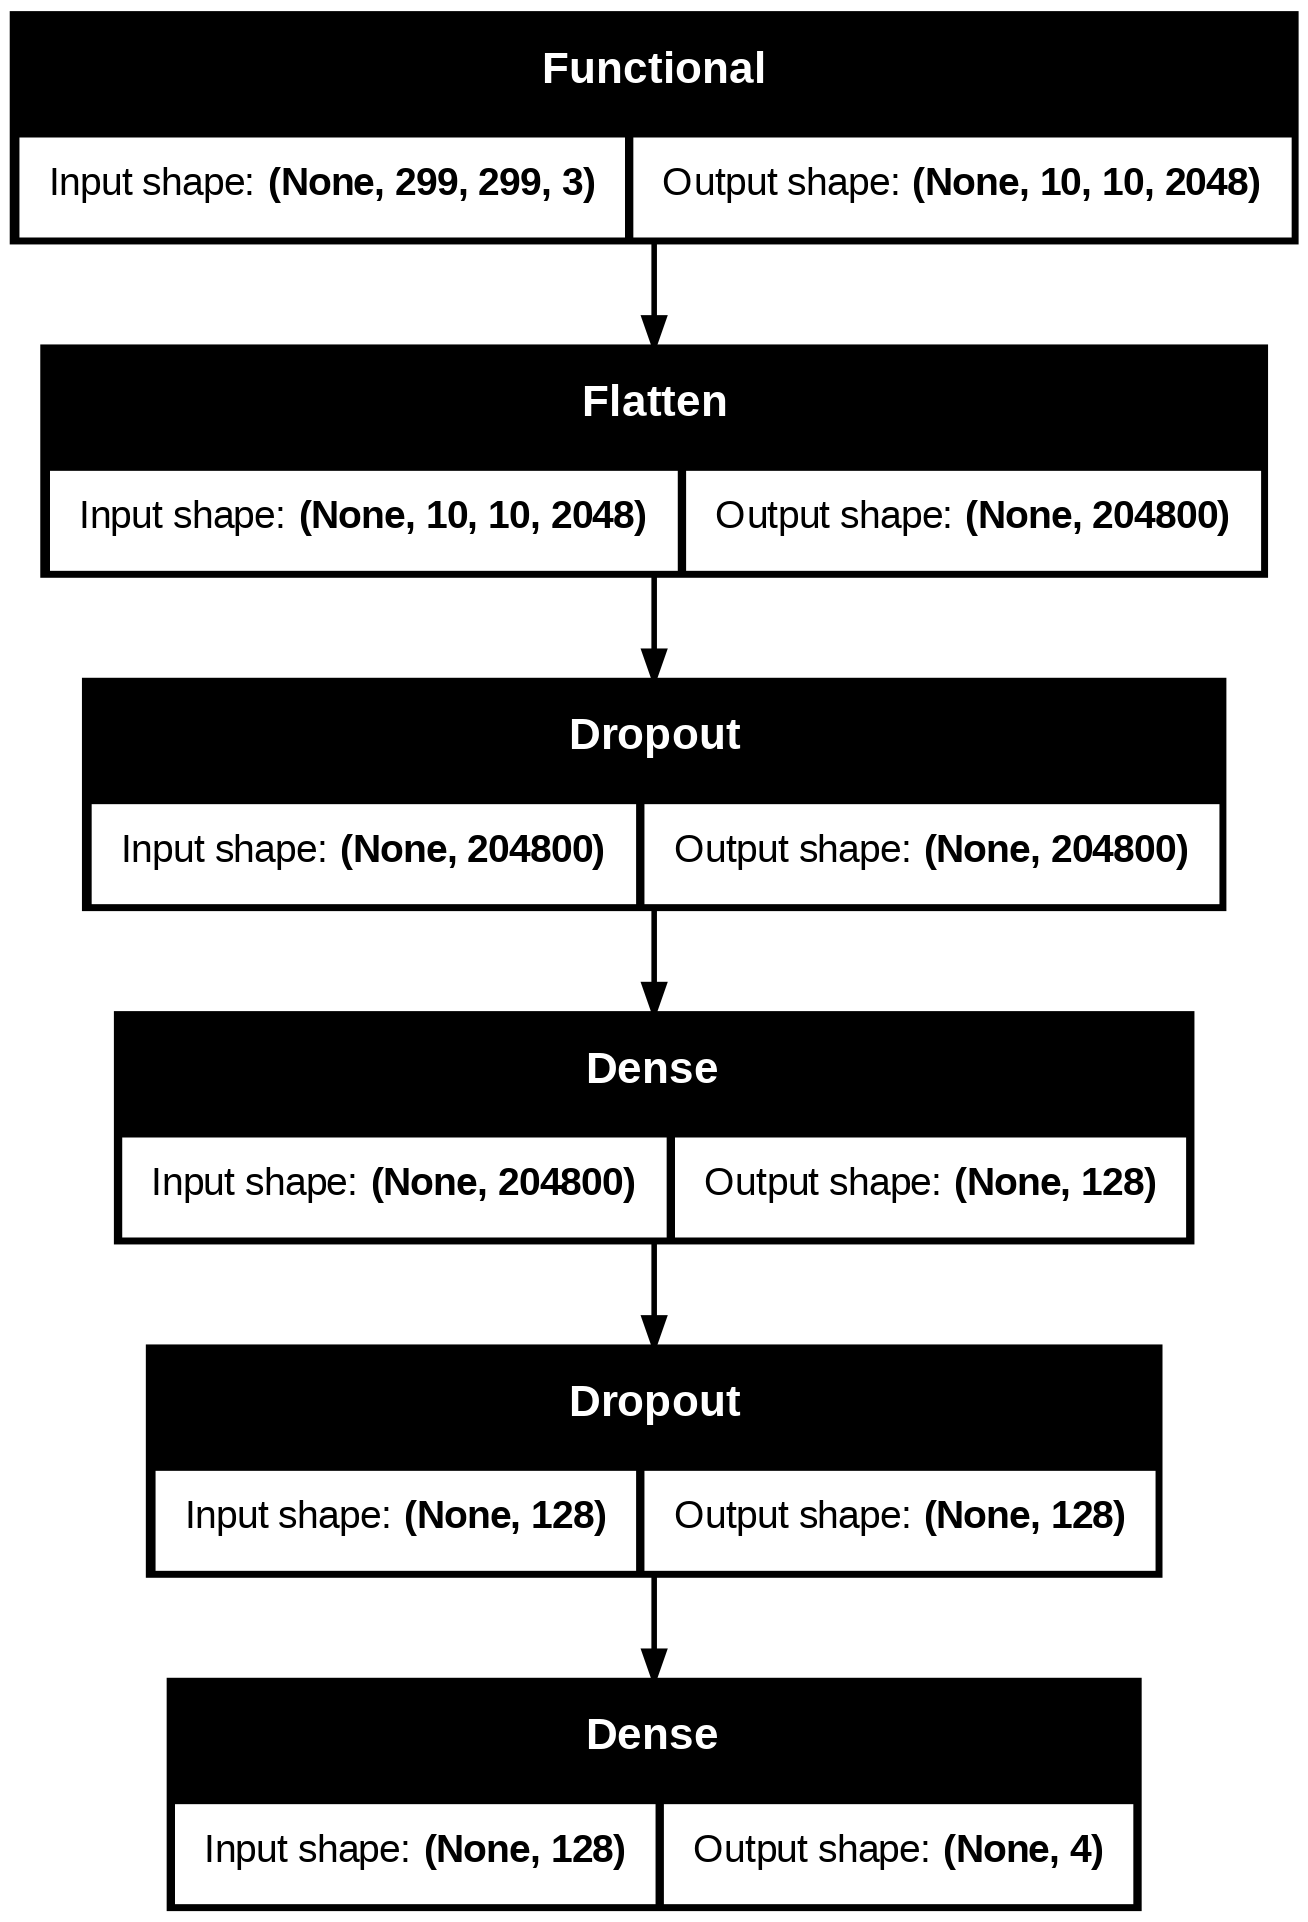

In [33]:
tf.keras.utils.plot_model(resnet_model, show_shapes=True)

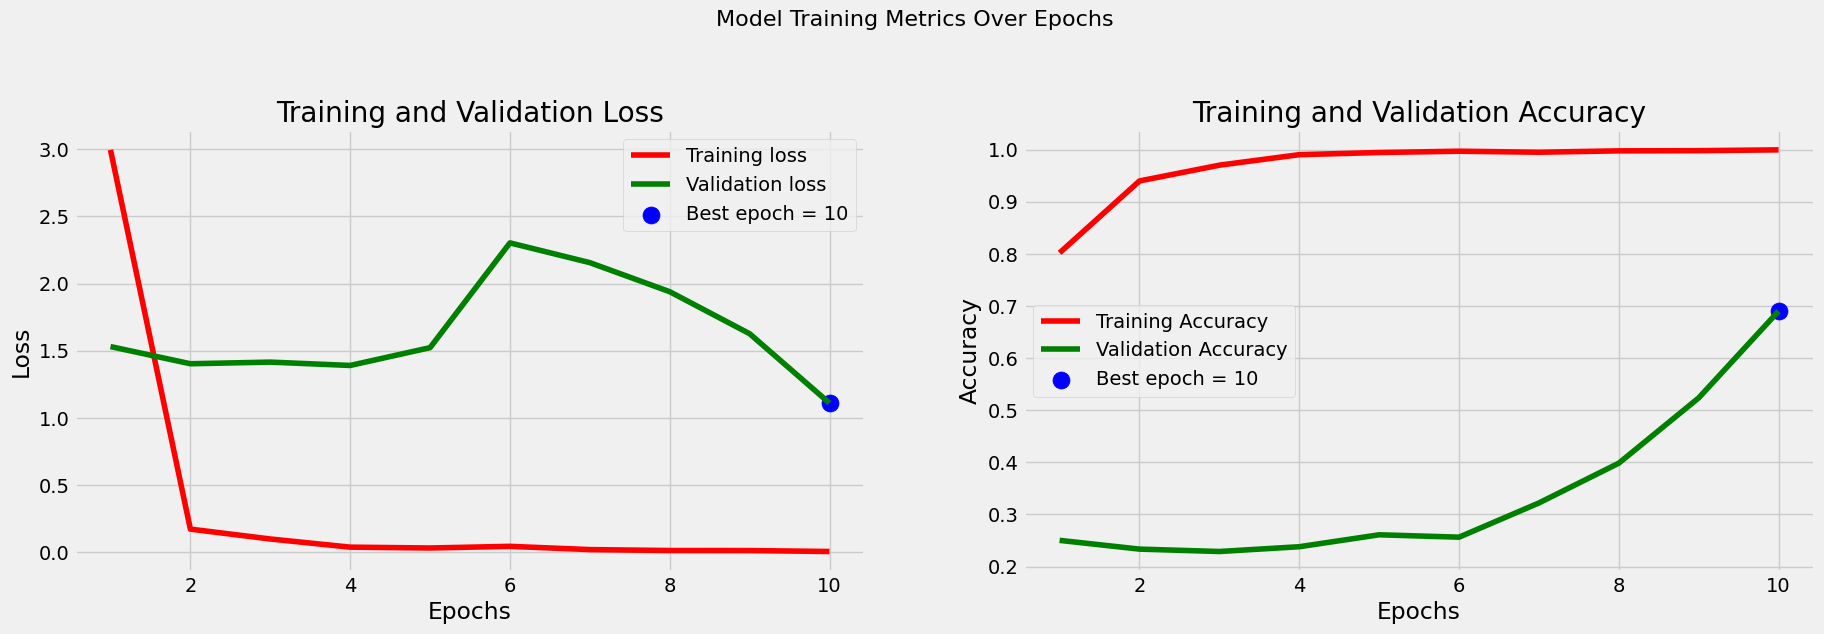

In [34]:
tr_acc = resnet_hist.history['accuracy']
tr_loss = resnet_hist.history['loss']

val_acc = resnet_hist.history['val_accuracy']
val_loss = resnet_hist.history['val_loss']


index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'



plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [35]:
train_score = resnet_model.evaluate(tr_gen, verbose=1)
valid_score = resnet_model.evaluate(valid_gen, verbose=1)
test_score  = resnet_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 421ms/step - accuracy: 0.6558 - loss: 1.1318
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step - accuracy: 0.6816 - loss: 1.1092
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6446 - loss: 1.1551
Train Loss: 1.1588
Train Accuracy: 65.21%
--------------------
Validation Loss: 1.1164
Validation Accuracy: 68.55%
--------------------
Test Loss: 1.0615
Test Accuracy: 67.99%


In [36]:
y_pred_resnet = np.argmax(resnet_model.predict(ts_gen), axis=1)

# Calculate metrics
acc_resnet = accuracy_score(ts_gen.classes, y_pred_resnet)
prec_resnet = precision_score(ts_gen.classes, y_pred_resnet, average='weighted')
recall_resnet = recall_score(ts_gen.classes, y_pred_resnet, average='weighted')
f1_resnet = f1_score(ts_gen.classes, y_pred_resnet, average='weighted')

# Print metrics
print("ResNet-50 Model Metrics:")
print(f"Accuracy: {acc_resnet}")
print(f"Precision: {prec_resnet}")
print(f"Recall: {recall_resnet}")
print(f"F1 Score: {f1_resnet}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step
ResNet-50 Model Metrics:
Accuracy: 0.6798780487804879
Precision: 0.8394639569661353
Recall: 0.6798780487804879
F1 Score: 0.6843432289859404


In [37]:
resnet_results = pd.DataFrame({
    'Model': ['ResNet-50'],
    'Accuracy': [acc_resnet],
    'Precision': [prec_resnet],
    'Recall': [recall_resnet],
    'F1 Score': [f1_resnet]
})
resnet_results

,Model,Accuracy,Precision,Recall,F1 Score
0,ResNet-50,0.679878,0.839464,0.679878,0.684343


## 3.3 InceptionV3 Model Training and Evaluation

In [38]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape)

inception_model = Sequential([
    inception,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

inception_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
incepton_hist = inception_model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle= False)
inception_model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.6562 - loss: 6.6031 - val_accuracy: 0.7603 - val_loss: 0.8758
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 72s 802ms/step - accuracy: 0.9030 - loss: 0.3008 - val_accuracy: 0.8672 - val_loss: 0.3301
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 805ms/step - accuracy: 0.9301 - loss: 0.2177 - val_accuracy: 0.9359 - val_loss: 0.1984
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 820ms/step - accuracy: 0.9699 - loss: 0.0995 - val_accuracy: 0.8962 - val_loss: 0.2587
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 72s 799ms/step - accuracy: 0.9774 - loss: 0.0704 - val_accuracy: 0.9313 - val_loss: 0.1507
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 73s 806ms/step - accuracy: 0.9740 - loss: 0.0750 - val_accuracy: 0.9023 - val_loss: 0.3205
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 803ms/step - accuracy: 0.9908 - loss: 0.0256 - val_accuracy: 0.9511 - val_loss: 0.2141
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 72s 801ms/

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,673,070 (441.26 MB)

 Trainable params: 38,546,212 (147.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 77,092,426 (294.08 MB)

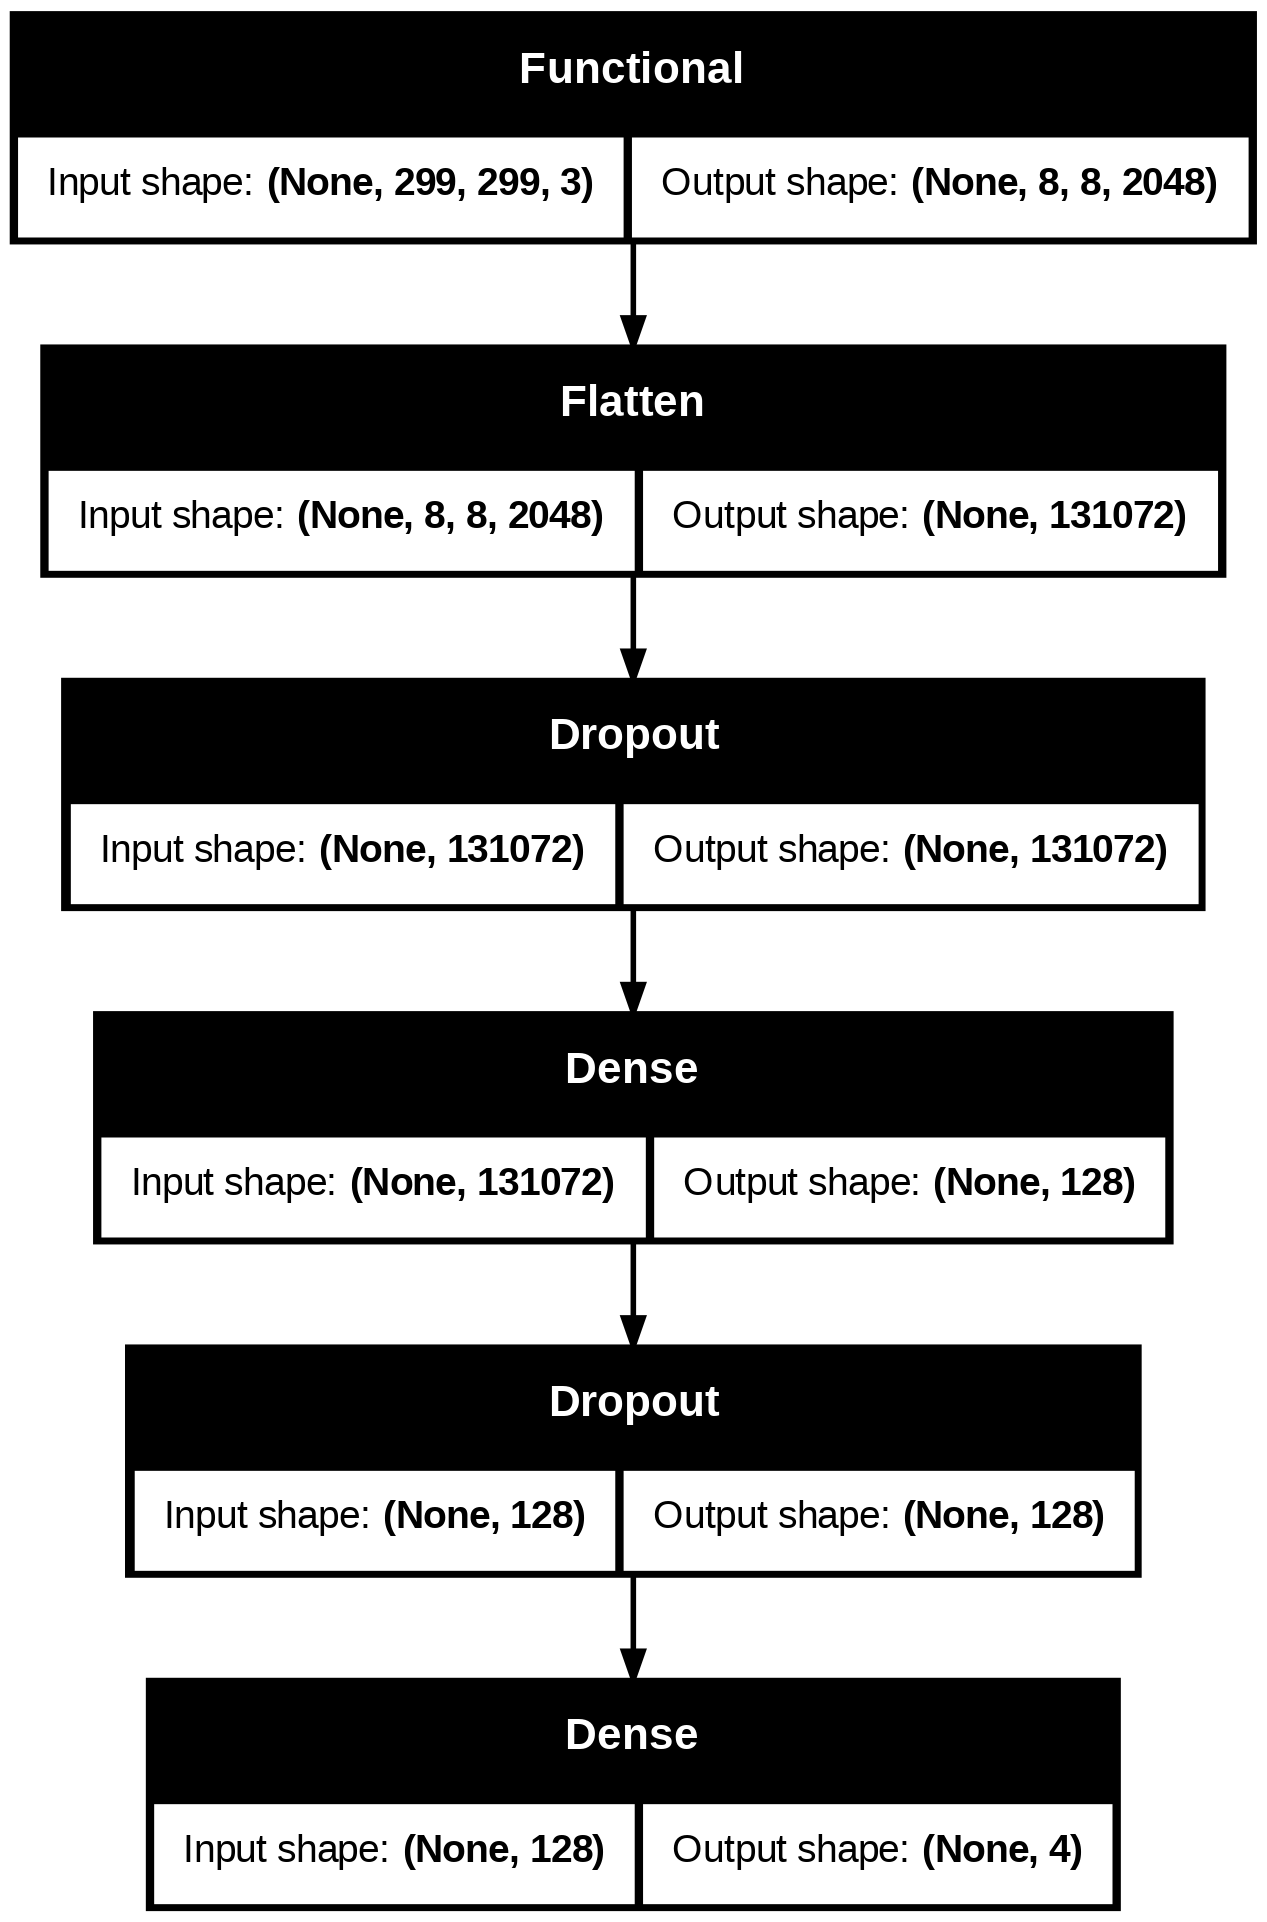

In [39]:
tf.keras.utils.plot_model(inception_model, show_shapes=True)

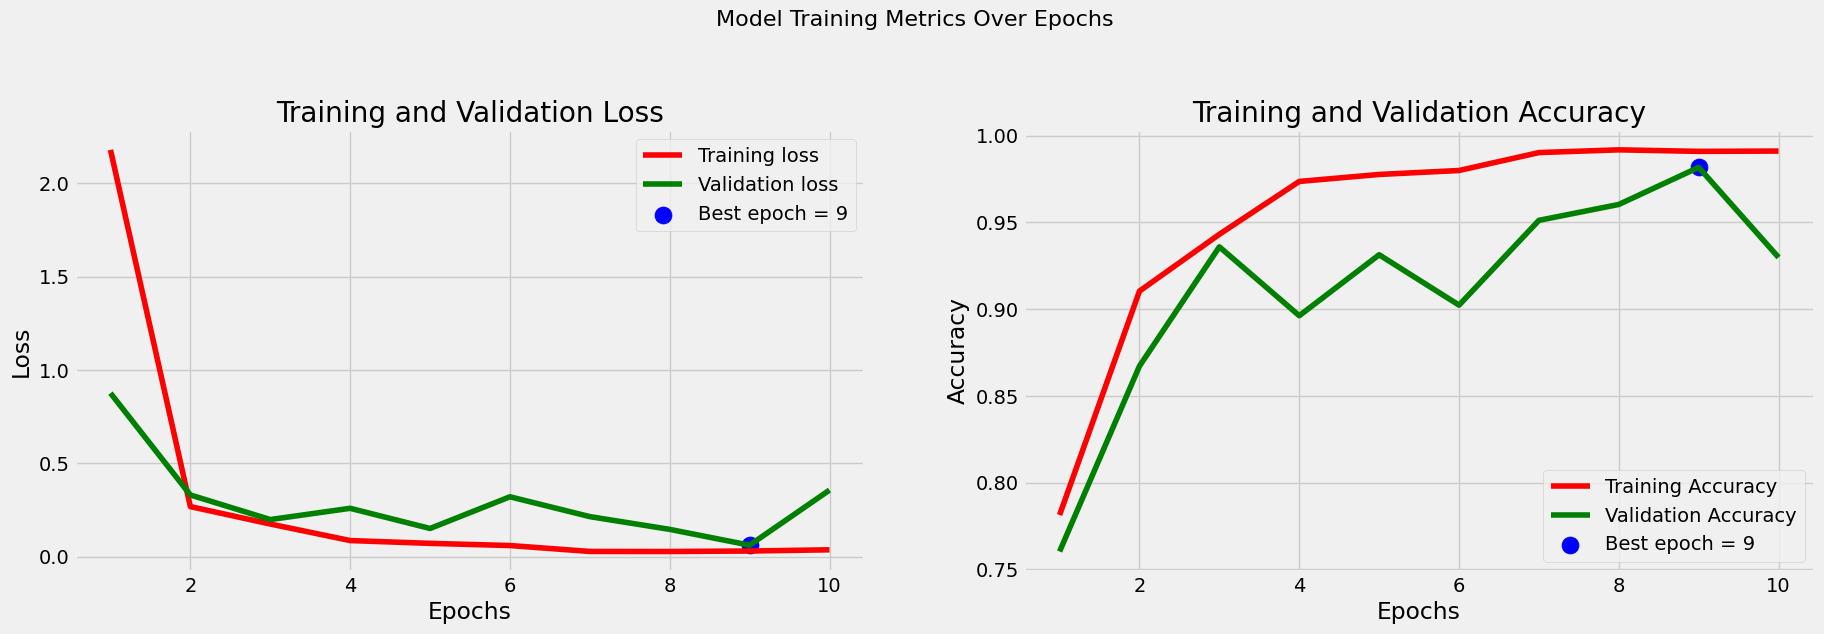

In [40]:
tr_acc = incepton_hist.history['accuracy']
tr_loss = incepton_hist.history['loss']

val_acc = incepton_hist.history['val_accuracy']
val_loss = incepton_hist.history['val_loss']


index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [41]:
train_score = inception_model.evaluate(tr_gen, verbose=1)
valid_score = inception_model.evaluate(valid_gen, verbose=1)
test_score  = inception_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 425ms/step - accuracy: 0.9672 - loss: 0.1141
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - accuracy: 0.9378 - loss: 0.3170
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9617 - loss: 0.1642
Train Loss: 0.1115
Train Accuracy: 96.59%
--------------------
Validation Loss: 0.3498
Validation Accuracy: 93.28%
--------------------
Test Loss: 0.2380
Test Accuracy: 94.66%


In [42]:
y_pred_inception = np.argmax(inception_model.predict(ts_gen), axis=1)

# Calculate metrics
acc_inception = accuracy_score(ts_gen.classes, y_pred_inception)
prec_inception = precision_score(ts_gen.classes, y_pred_inception, average='weighted')
recall_inception = recall_score(ts_gen.classes, y_pred_inception, average='weighted')
f1_inception = f1_score(ts_gen.classes, y_pred_inception, average='weighted')

# Print metrics
print("InceptionV3 Model Metrics:")
print(f"Accuracy: {acc_inception}")
print(f"Precision: {prec_inception}")
print(f"Recall: {recall_inception}")
print(f"F1 Score: {f1_inception}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step
InceptionV3 Model Metrics:
Accuracy: 0.9466463414634146
Precision: 0.9558000926893936
Recall: 0.9466463414634146
F1 Score: 0.9468160651918646


In [43]:
inception_results = pd.DataFrame({
    'Model': ['InceptionV3'],
    'Accuracy': [acc_inception],
    'Precision': [prec_inception],
    'Recall': [recall_inception],
    'F1 Score': [f1_inception]
})
inception_results

,Model,Accuracy,Precision,Recall,F1 Score
0,InceptionV3,0.946646,0.9558,0.946646,0.946816


## 3.4 EfficentNet-B0 Model Training and Evaluation

In [44]:
efficent = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_shape)

efficent_model = Sequential([
    efficent,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

efficent_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
efficent_hist = efficent_model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle= False)
efficent_model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.7651 - loss: 1.5992 - val_accuracy: 0.3084 - val_loss: 7.2147
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 517ms/step - accuracy: 0.9602 - loss: 0.1208 - val_accuracy: 0.3084 - val_loss: 4.2300
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 492ms/step - accuracy: 0.9812 - loss: 0.0567 - val_accuracy: 0.3115 - val_loss: 4.4152
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 491ms/step - accuracy: 0.9880 - loss: 0.0340 - val_accuracy: 0.3557 - val_loss: 3.3248
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 507ms/step - accuracy: 0.9932 - loss: 0.0181 - val_accuracy: 0.4427 - val_loss: 2.2936
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 494ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.6229 - val_loss: 1.7441
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 498ms/step - accuracy: 0.9972 - loss: 0.0112 - val_accuracy: 0.7237 - val_loss: 1.1420
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 520ms/

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 10, 10, 1280)        │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 128000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      16,384,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,218,601 (233.53 MB)

 Trainable params: 20,392,192 (77.79 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 40,784,386 (155.58 MB)

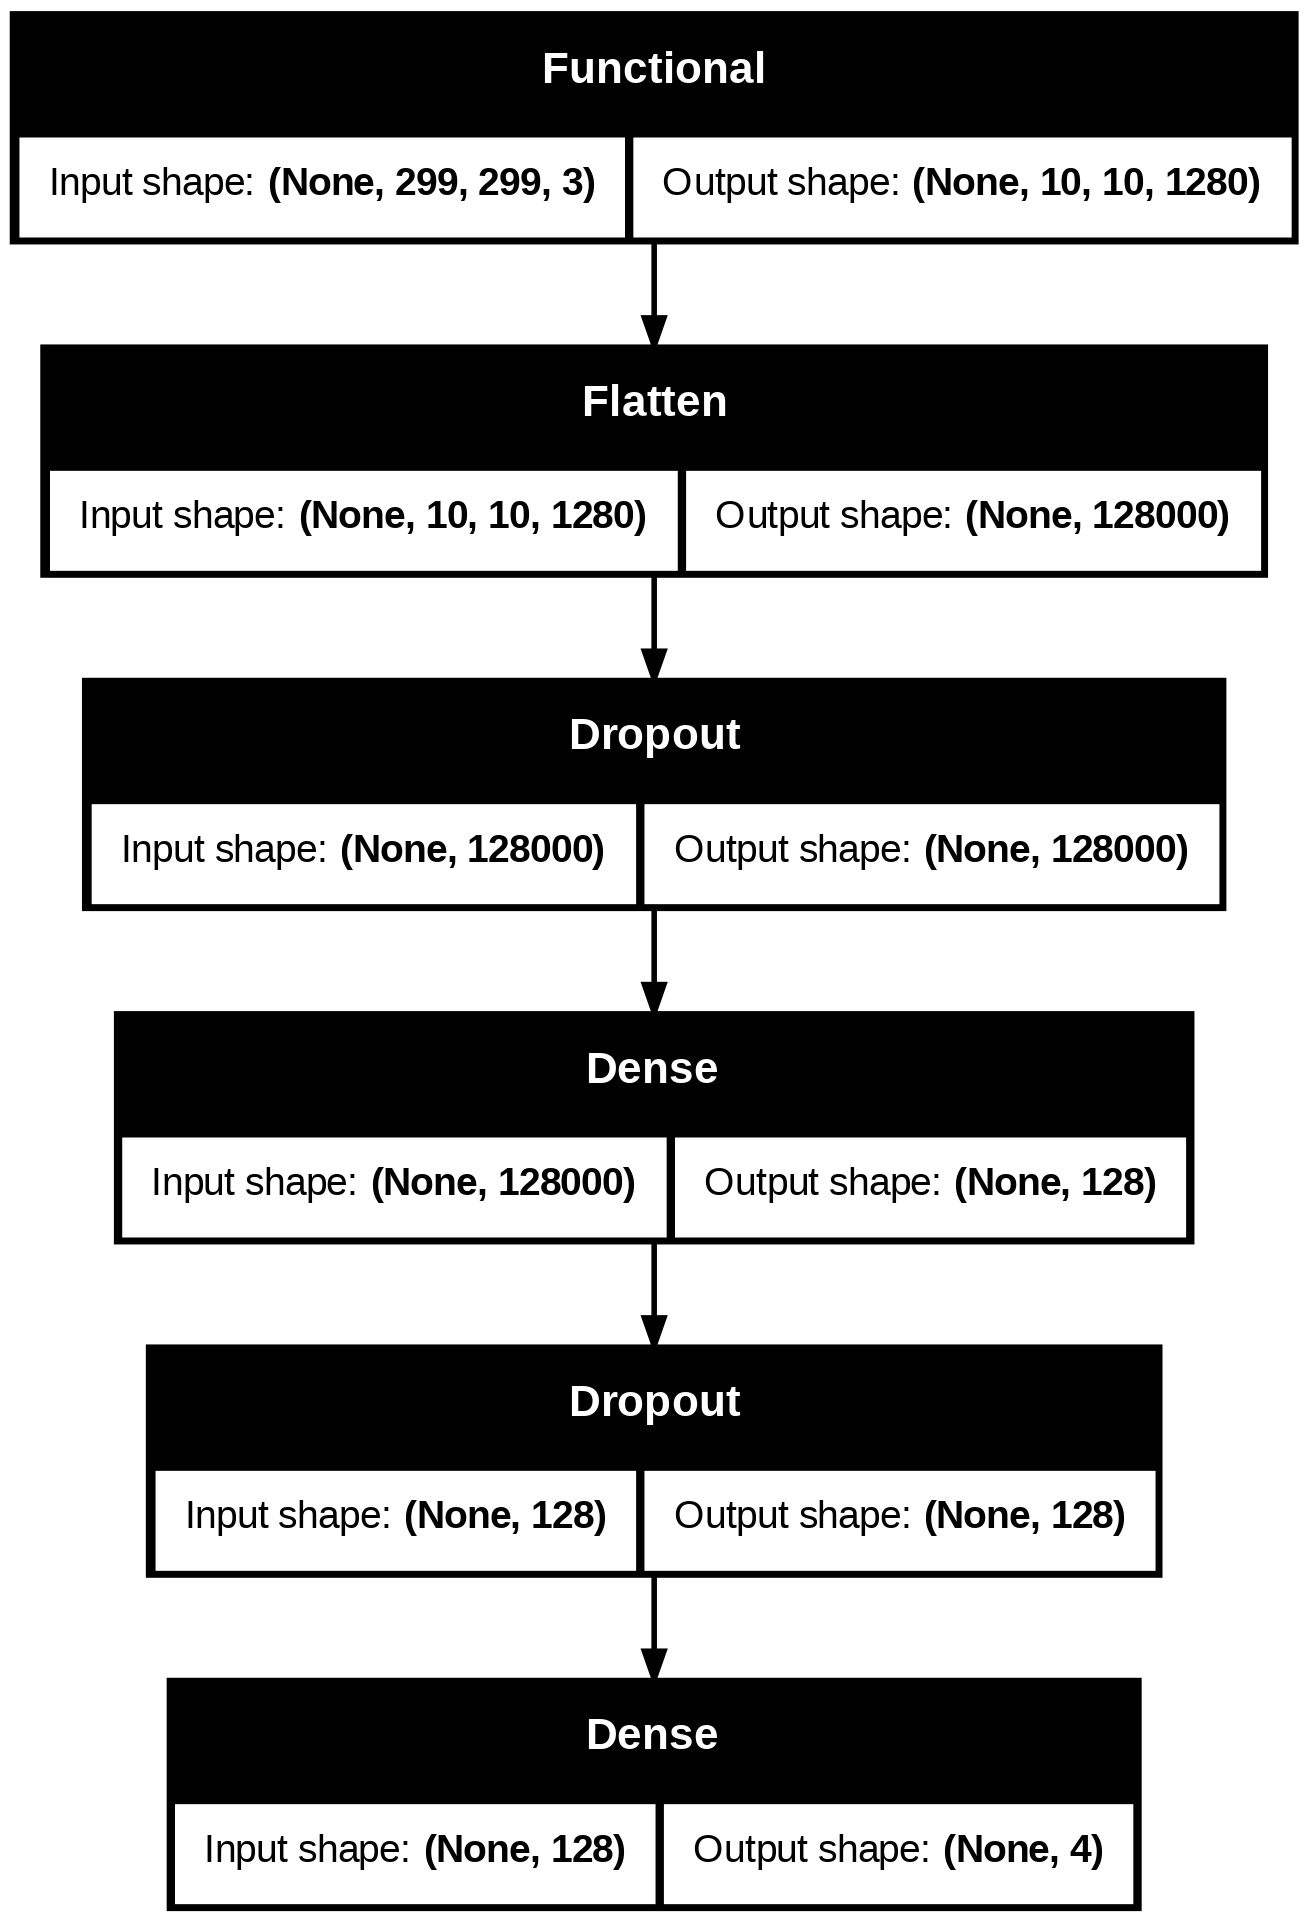

In [45]:
tf.keras.utils.plot_model(efficent_model, show_shapes=True)

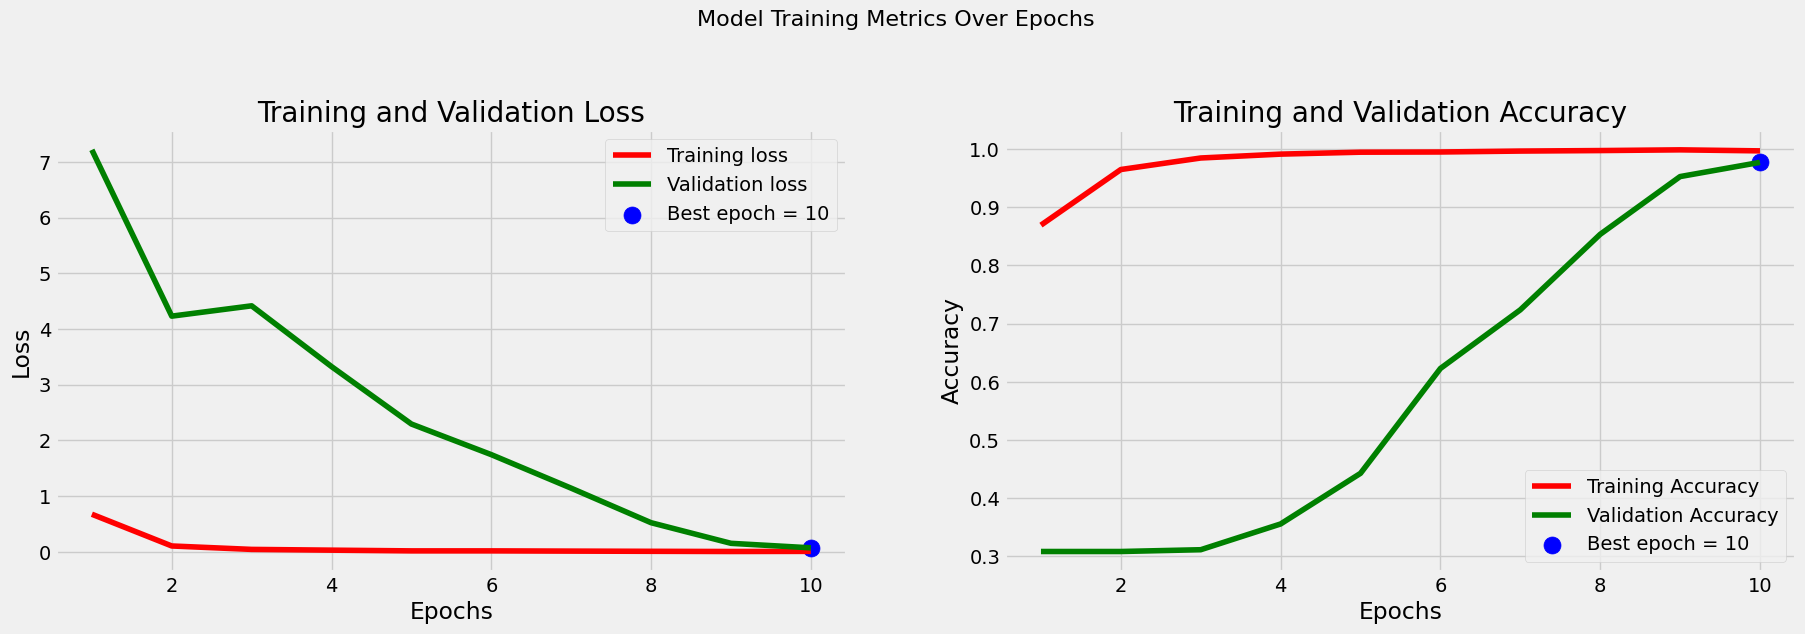

In [46]:
tr_acc = efficent_hist.history['accuracy']
tr_loss = efficent_hist.history['loss']
val_acc = efficent_hist.history['val_accuracy']
val_loss = efficent_hist.history['val_loss']


index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'



plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [47]:
train_score = efficent_model.evaluate(tr_gen, verbose=1)
valid_score = efficent_model.evaluate(valid_gen, verbose=1)
test_score = efficent_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 389ms/step - accuracy: 0.9963 - loss: 0.0122
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - accuracy: 0.9726 - loss: 0.0747
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9861 - loss: 0.0320
Train Loss: 0.0134
Train Accuracy: 99.54%
--------------------
Validation Loss: 0.0679
Validation Accuracy: 97.40%
--------------------
Test Loss: 0.0418
Test Accuracy: 98.17%


In [48]:
y_pred_efficent = np.argmax(efficent_model.predict(ts_gen), axis=1)

# Calculate metrics
acc_efficent = accuracy_score(ts_gen.classes, y_pred_efficent)
prec_efficent = precision_score(ts_gen.classes, y_pred_efficent, average='weighted')
recall_efficent = recall_score(ts_gen.classes, y_pred_efficent, average='weighted')
f1_efficent = f1_score(ts_gen.classes, y_pred_efficent, average='weighted')

# Print metrics
print("EfficientNet-B0 Model Metrics:")
print(f"Accuracy: {acc_efficent}")
print(f"Precision: {prec_efficent}")
print(f"Recall: {recall_efficent}")
print(f"F1 Score: {f1_efficent}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step
EfficientNet-B0 Model Metrics:
Accuracy: 0.9817073170731707
Precision: 0.9820899943085823
Recall: 0.9817073170731707
F1 Score: 0.9816313855292826


In [49]:
efficent_results = pd.DataFrame({
    'Model': ['EfficientNet-B0'],
    'Accuracy': [acc_efficent],
    'Precision': [prec_efficent],
    'Recall': [recall_efficent],
    'F1 Score': [f1_efficent]
})
efficent_results

,Model,Accuracy,Precision,Recall,F1 Score
0,EfficientNet-B0,0.981707,0.98209,0.981707,0.981631


In [50]:
Results = pd.concat([xception_results, resnet_results, inception_results, efficent_results], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score
0,Xception,0.996951,0.996991,0.996951,0.996951
1,ResNet-50,0.679878,0.839464,0.679878,0.684343
2,InceptionV3,0.946646,0.955800,0.946646,0.946816
3,EfficientNet-B0,0.981707,0.982090,0.981707,0.981631


In [51]:
preds = xception_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step


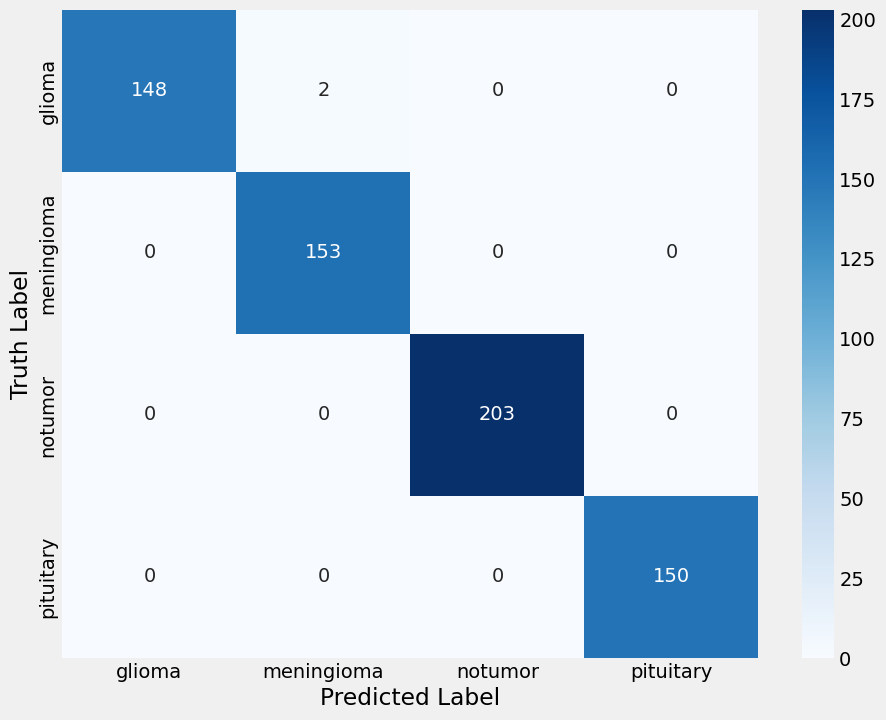

In [52]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [53]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.99      1.00      0.99       153
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       150

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



## 5.2 Testing

In [54]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = xception_model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


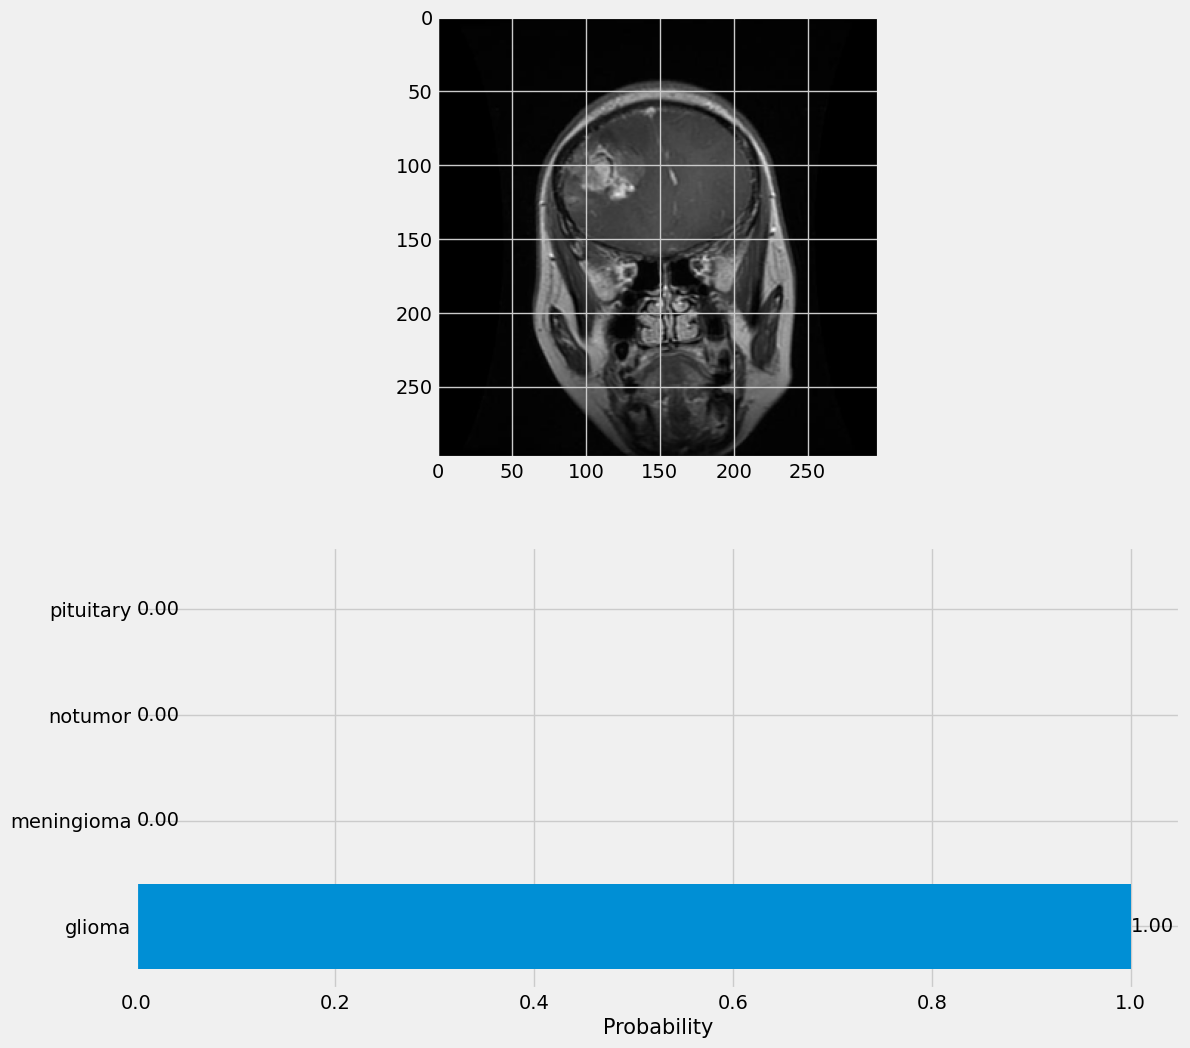

In [55]:
predict('Training/glioma/Tr-glTr_0000.jpg')